In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
import warnings
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")

### Q1

In [134]:
df = pd.read_parquet('../data/fhv_tripdata_2021-01.parquet')
val_df = pd.read_parquet('../data/fhv_tripdata_2021-02.parquet')

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154112 entries, 0 to 1154111
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1154112 non-null  object        
 1   pickup_datetime         1154112 non-null  datetime64[ns]
 2   dropOff_datetime        1154112 non-null  datetime64[ns]
 3   PUlocationID            195845 non-null   float64       
 4   DOlocationID            991892 non-null   float64       
 5   SR_Flag                 0 non-null        object        
 6   Affiliated_base_number  1153227 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 61.6+ MB


### Q2

In [138]:
df.dropOff_datetime = pd.to_datetime(df.dropOff_datetime)
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)

In [139]:
df['duration'] = df.dropOff_datetime - df.pickup_datetime

In [140]:
df.duration = df.duration.apply(lambda x: x.total_seconds() / 60)

In [141]:
df.duration.mean()

19.167224093791006

In [142]:
df = df[(df.duration >= 1) & (df.duration <= 60)]
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1109826 entries, 0 to 1154111
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1109826 non-null  object        
 1   pickup_datetime         1109826 non-null  datetime64[ns]
 2   dropOff_datetime        1109826 non-null  datetime64[ns]
 3   PUlocationID            182818 non-null   float64       
 4   DOlocationID            961919 non-null   float64       
 5   SR_Flag                 0 non-null        object        
 6   Affiliated_base_number  1109053 non-null  object        
 7   duration                1109826 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 76.2+ MB


<AxesSubplot:xlabel='duration', ylabel='Density'>

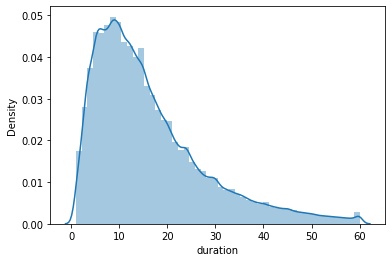

In [143]:
sns.distplot(df.duration)

### Q3

In [145]:
df.fillna(-1, inplace=True)

In [149]:
df.PUlocationID.value_counts()[-1]/len(df)

0.8352732770722617

### Q4

In [153]:
categorical = ['PUlocationID', 'DOlocationID']
# numerical = ['trip_distance']

In [157]:
df[categorical] = df[categorical].astype('str')

In [158]:
train_dicts = df[categorical].to_dict(orient='records')

In [171]:
dict_vect = DictVectorizer()
dict_vect.fit(train_dicts)
X_train = dict_vect.transform(train_dicts)

In [172]:
X_train.shape

(1109826, 525)

### Preprocessing Validation Data

In [178]:
val_df.dropOff_datetime = pd.to_datetime(val_df.dropOff_datetime)
val_df.pickup_datetime = pd.to_datetime(val_df.pickup_datetime)

val_df['duration'] = val_df.dropOff_datetime - val_df.pickup_datetime

val_df.duration = val_df.duration.apply(lambda x: x.total_seconds() / 60)

val_val_df = val_df[(val_df.duration >= 1) & (val_df.duration <= 60)]

val_df.fillna(-1, inplace=True)

val_df[categorical] = val_df[categorical].astype('str')

val_dicts = val_df[categorical].to_dict(orient='records')



In [179]:
X_val = dict_vect.transform(val_dicts)
X_val.shape

(1037692, 525)

### Q5

In [180]:
target = 'duration'
y_train = df[target].values
y_val = val_df[target].values

In [181]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [182]:
y_pred_train = lr.predict(X_train)

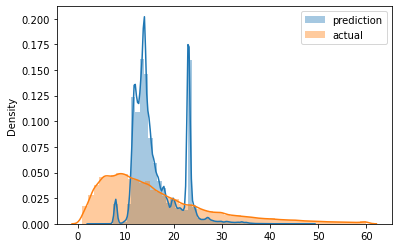

In [183]:
sns.distplot(y_pred_train,label="prediction")
sns.distplot(y_train,label="actual")
plt.legend()
plt.show()

In [184]:
mean_squared_error(y_train, y_pred_train, squared=False)


10.528519107211306

### Q6

In [185]:
y_pred_val = lr.predict(X_val)

In [186]:
mean_squared_error(y_val, y_pred_val, squared=False)


160.9855748060578